In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bikesharing_day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data.corr(numeric_only=True)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [6]:
data = data.drop([ 'dteday', 'casual', 'instant', 'registered', 'yr'], axis=1)

In [7]:
data.to_csv('bikesharing_clean.csv', index=False)

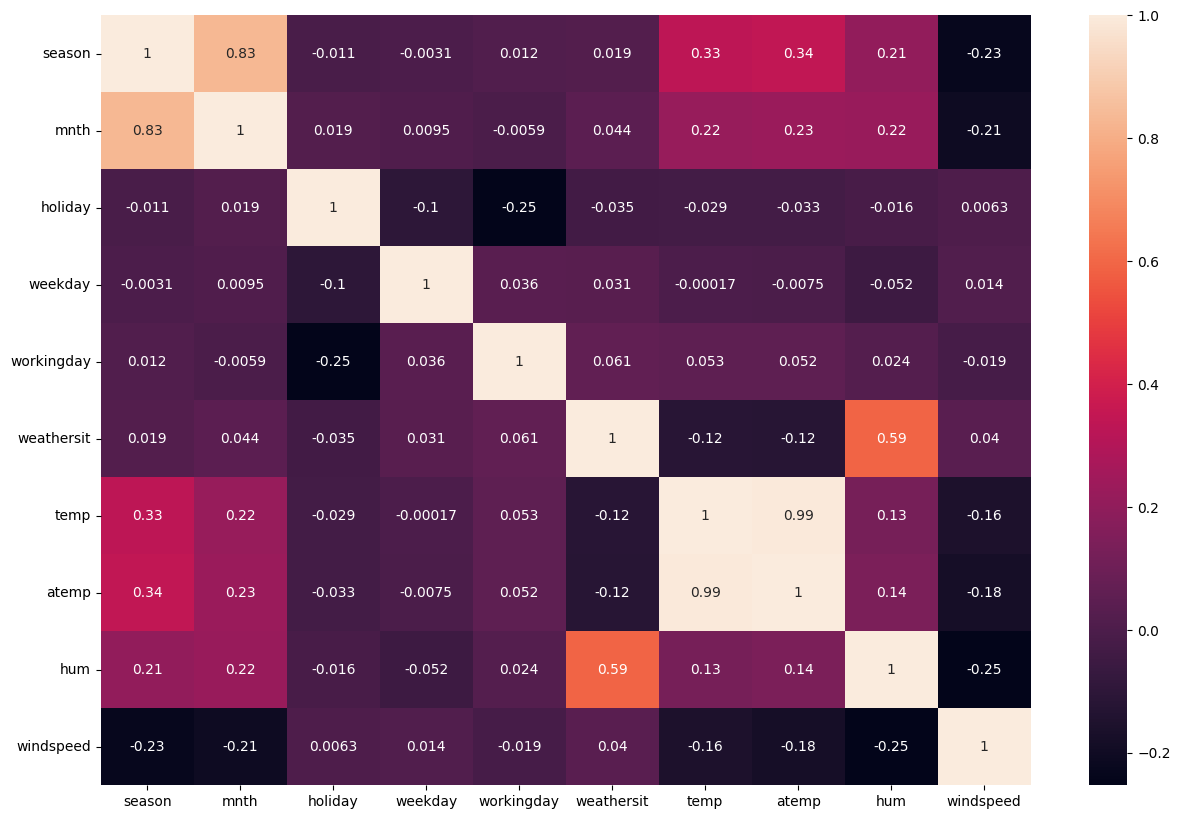

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(data.drop('cnt', axis=1).corr(numeric_only=True), annot=True)
plt.show()

In [9]:
cov_mat = np.cov(data.drop('cnt', axis=1).T)

eig_val, eig_vec = np.linalg.eig(cov_mat.T)

idx = np.argsort(eig_val)[::-1] #Get the indices to sort eigenvalues in decreasing order
eig_val, eig_vec = eig_val[idx], eig_vec[idx] #Sort both eigenvalues and eigenvectors using idx

np.cumsum(eig_val)/sum(eig_val) # First 6 eigenvectors explain 99.76% variance

array([0.7192731 , 0.94515306, 0.96551732, 0.98266022, 0.99472509,
       0.99759886, 0.99903739, 0.99971551, 0.99998693, 1.        ])

In [10]:
data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


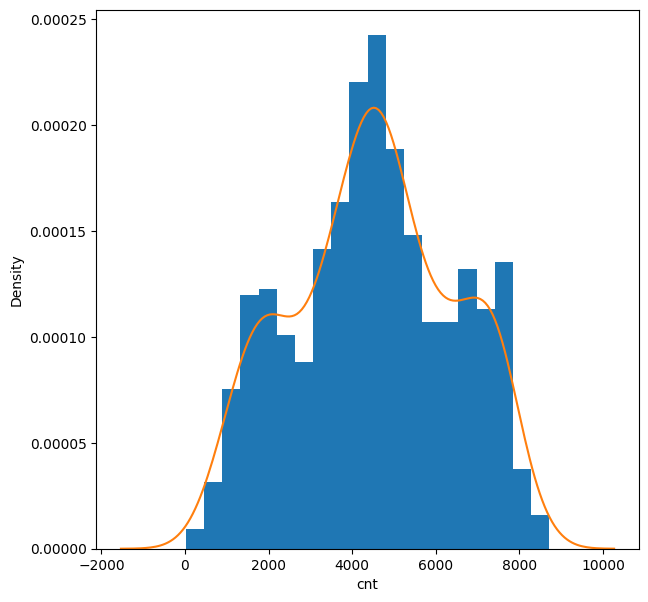

In [11]:
fig, ax = plt.subplots(figsize=(7,7))

ax.hist(data['cnt'], bins=20, density=True)
sns.kdeplot(data=data, x='cnt', ax=ax)
plt.show()

In [12]:
data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [13]:
data.season.value_counts().sort_index()

season
1    181
2    184
3    188
4    178
Name: count, dtype: int64

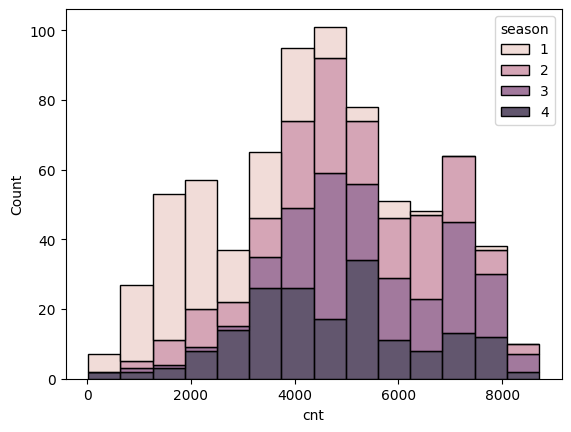

In [14]:
sns.histplot(data=data, x='cnt', hue='season', multiple='stack')
plt.show()

In [15]:
data.groupby('season').agg({'cnt':'sum'})

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [16]:
data.holiday.value_counts() #clearly 1 means holiday and 0 means working day

holiday
0    710
1     21
Name: count, dtype: int64

In [17]:
data.groupby('holiday').agg({'cnt':'mean'}).round(0)

,cnt
holiday,
0,4527.0
1,3735.0


We see average count of bike rentals higher on working day. Let us see this for casual and registered users. Casual users are expected more on holidays than working days.

In [18]:
full_data = pd.read_csv('bikesharing_day.csv')

In [19]:
full_data.groupby('holiday').agg({
    'cnt':'mean',
    'casual':'mean',
    'registered':'mean'
}).round(0)

,cnt,casual,registered
holiday,,,
0,4527.0,842.0,3685.0
1,3735.0,1065.0,2670.0


As expected casual users are higher on holidays compared to working days while registered users are more on working days.

Let us look at variation of bike rentals with weather and season

In [20]:
data.weathersit.value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

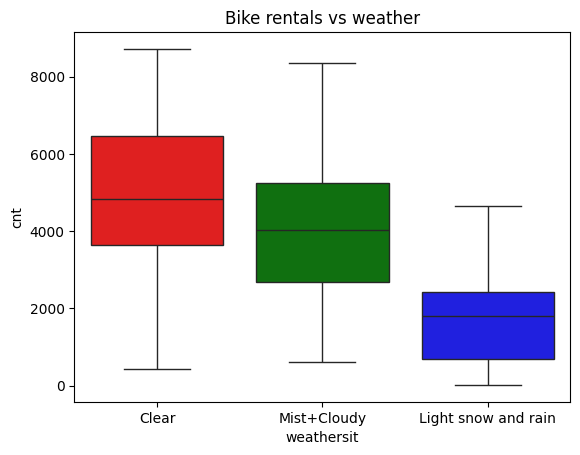

In [21]:
fig, ax = plt.subplots()

bplots = sns.boxplot(data=data, x='weathersit', y='cnt', ax=ax, palette=['r','g','b','y'])

ax.set_xticklabels(['Clear', 'Mist+Cloudy', 'Light snow and rain','Thunderstorm'])
ax.set_title('Bike rentals vs weather')
plt.show()

In [22]:
data.season.value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

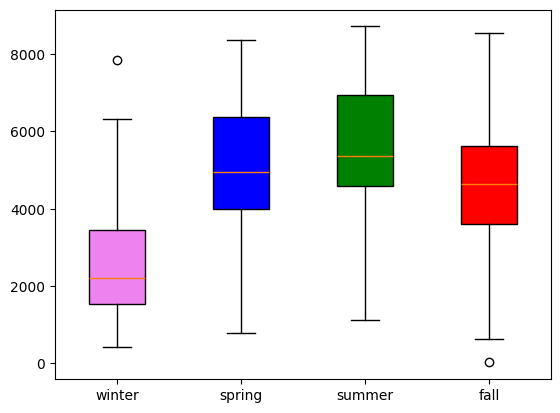

In [23]:
fig, ax = plt.subplots()

season_cnt = []

for i in range(1,5,1):
    season_cnt.append(data[data.season==i]['cnt'])

colors = ['violet','blue','green','red']

bplot = ax.boxplot(season_cnt, patch_artist=True, tick_labels=['winter','spring','summer','fall'])

for box, color in zip(bplot['boxes'], colors):
    box.set_facecolor(color)

plt.show()

We see no bike rentals for thunderstorms as expected and highest for clear weather.
Winter has least bike rentals as expected because it is Washington D.C. data which sees subzero temperatures in winter.